In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### Preparing the Data

In [ ]:
# from zipfile import ZipFile
# file_name = '/content/bonn-university-eeg-data.zip'

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
# # zip = ZipFile(file_name)
# # zip.extractall()
#   print('Done')
# # !unzip bonn_egg_data.zip

In [ ]:
# df = pd.DataFrame()
# dirs = ['s', 'f', 'n', 'o', 'z']
# y_values = []
# j=0
# for i in range(5):
#     directory = f'/content/{dirs[i]}/{dirs[i].upper()}'
#     for filename in os.listdir(directory):
#         temp_df = pd.read_csv(f'{directory}/{filename}', names = ['Values'])
#         df = pd.concat([df, temp_df], axis = 1, ignore_index=True)
#         y_values.append(i)
#         j+=1

In [ ]:
# df = df.T

In [ ]:
# filtered bonn data file....it is passed through a filter of 40Hz
df = pd.read_csv("/content/filt.csv")

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0,-4.511051,-35.391532,-124.760891,-262.221135,-370.784695,-385.794531,-327.719034,-245.137595,-126.955498,...,218.331307,174.215246,160.536325,158.483524,162.669470,184.714121,225.744023,262.961922,267.331767,220.837577
1,1,-7.209627,-53.425583,-173.578708,-323.217979,-378.881756,-294.872040,-177.100228,-132.097514,-138.752229,...,-491.652285,-499.051184,-471.576336,-415.460179,-338.836090,-256.294479,-179.271603,-114.207661,-71.295148,-61.067749
2,2,8.075587,62.935870,219.282392,451.490345,614.350741,593.055928,440.502955,280.474273,149.472342,...,-175.049562,-166.693554,-126.822432,-80.588476,-47.791718,-37.471903,-47.280913,-66.072061,-79.563058,-80.249024
3,3,-9.243627,-74.405980,-270.421759,-589.009831,-859.491371,-876.334030,-578.878022,-50.654136,571.893108,...,42.661919,13.301907,9.448016,13.820271,15.970074,13.144629,8.276427,6.096152,7.756942,28.571457
4,4,-10.089449,-74.987720,-244.568088,-457.833265,-543.266983,-448.083101,-355.399835,-450.557806,-676.410307,...,625.416874,883.198023,1039.393205,1079.367829,1014.091533,884.105400,728.995868,566.398121,404.944153,250.675365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,-1.288872,-9.438661,-30.191451,-55.178264,-63.777172,-51.150708,-37.319124,-37.586808,-43.490769,...,7.922582,21.059482,36.543036,50.420155,60.624415,65.490396,63.948189,57.228407,46.812713,31.354346
496,496,-0.402772,-2.801059,-8.240577,-12.712676,-9.051150,2.403910,10.447096,4.779948,-12.688484,...,-25.472327,-40.335063,-45.949069,-41.200209,-31.887174,-25.754791,-27.399097,-33.603428,-36.714948,-35.554324
497,497,0.402772,3.103139,9.938599,15.719485,7.584936,-16.974350,-35.419859,-20.564545,23.892931,...,-3.832633,20.304486,35.373832,32.969559,21.177210,7.312083,-17.680558,-62.390641,-108.472124,-120.041072
498,498,0.281941,2.295043,8.432418,18.602846,27.815882,30.604375,27.063479,21.508146,16.749073,...,12.750444,32.991465,48.929946,57.218825,56.424022,45.840071,29.871576,18.068067,17.538932,26.987031


In [ ]:
labels = []
for i in range(5):
    for j in range(100):
        labels.append(i+1)
labels = pd.get_dummies(labels,  prefix = 'y')
labels

,y_1,y_2,y_3,y_4,y_5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
495,0,0,0,0,1
496,0,0,0,0,1
497,0,0,0,0,1
498,0,0,0,0,1


### STFT

In [ ]:
# converting dataframe to array
arr = df.iloc[:,:].values
# declaring some arrays
arr_f = []
arr_t = []
arr_z = []
# net_f = []
# net_t = []
# net_z = []

In [ ]:
# len(net_f)

In [ ]:
from scipy.signal import stft

# Calculating STFT
for i in range(500):
    f, t, Zxx = stft(arr[i], fs=173.61, window='hann', nperseg=256, noverlap=None)
    arr_f.append(f)
    arr_t.append(t)
    arr_z.append(Zxx)
    # net_f.extend(f)
    # net_t.extend(t)
    # net_z.extend(Zxx)

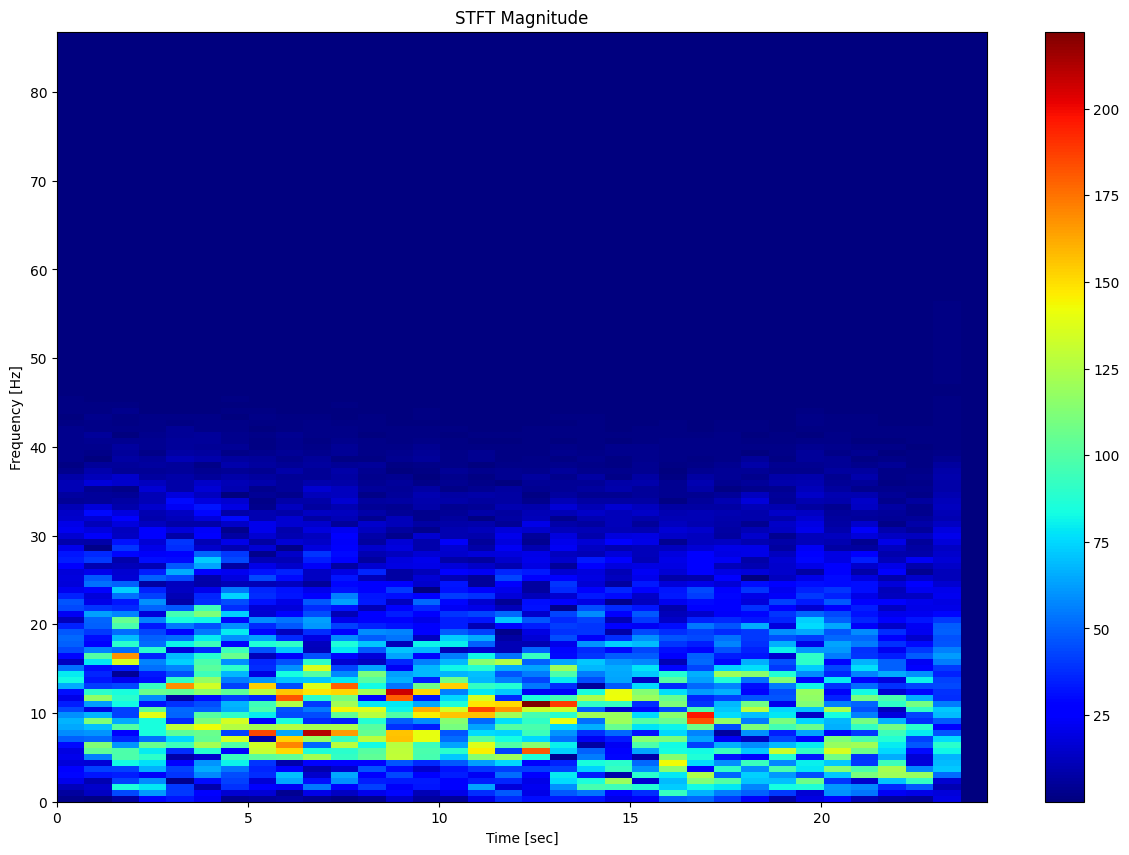

In [ ]:
# Plotting STFT
plt.figure(figsize = (15, 10))
plt.imshow(np.abs(arr_z[0]), aspect='auto', origin='lower', cmap='jet',
           extent=[arr_t[0].min(), arr_t[0].max(), arr_f[0].min(), arr_f[0].max()])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()


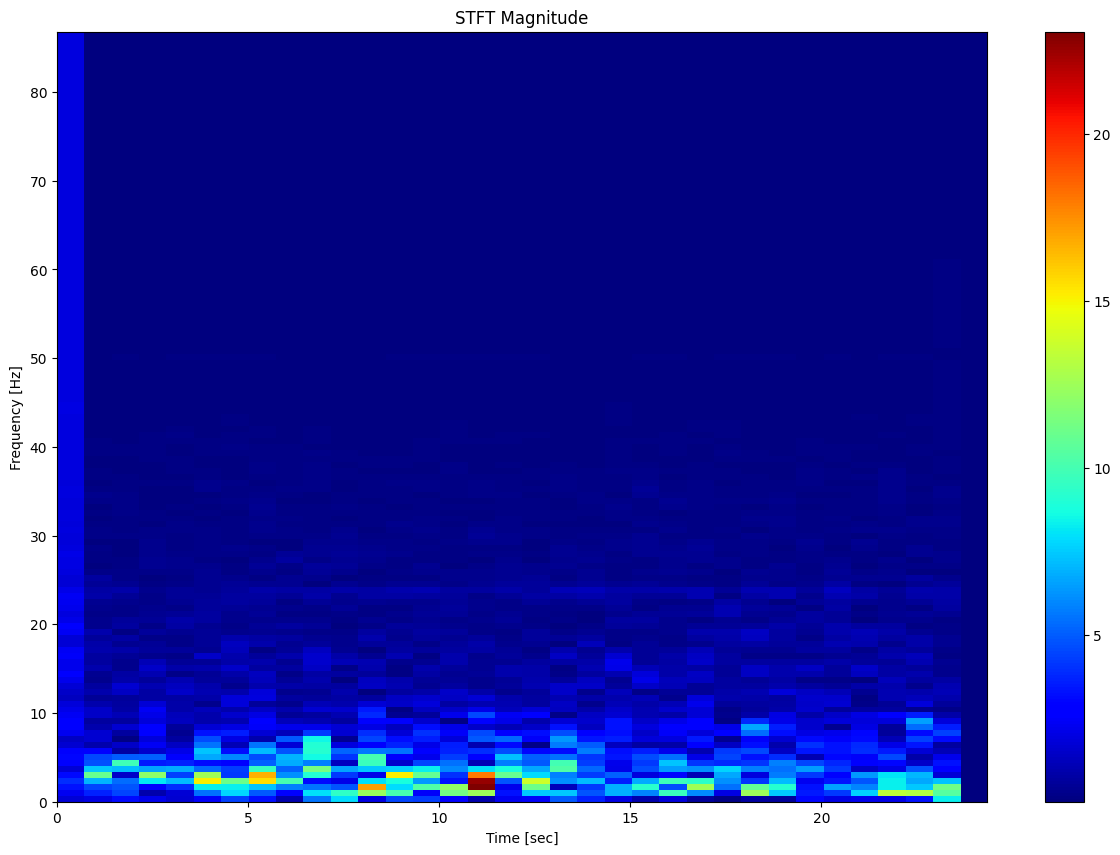

In [ ]:
# Plotting STFT
plt.figure(figsize = (15, 10))
plt.imshow(np.abs(arr_z[250]), aspect='auto', origin='lower', cmap='jet',
           extent=[arr_t[250].min(), arr_t[250].max(), arr_f[250].min(), arr_f[250].max()])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

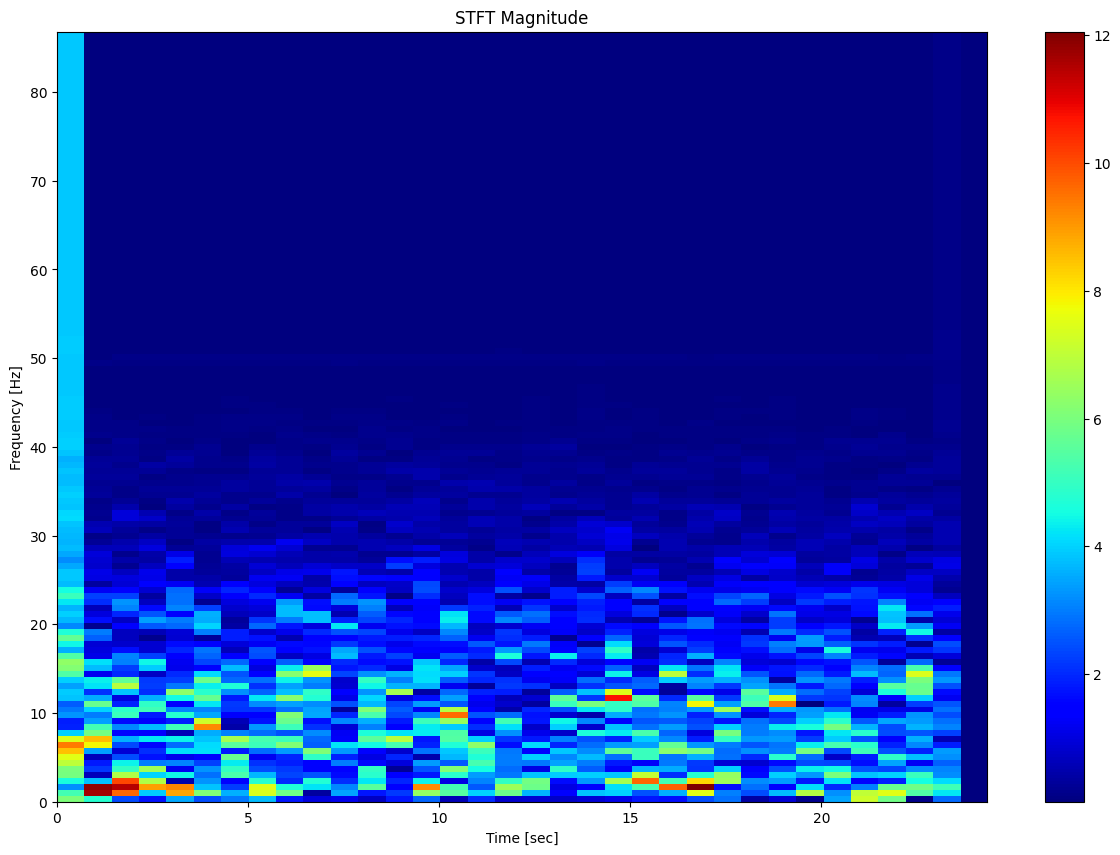

In [ ]:
# Plotting STFT
plt.figure(figsize = (15, 10))
plt.imshow(np.abs(arr_z[499]), aspect='auto', origin='lower', cmap='jet',
           extent=[arr_t[499].min(), arr_t[499].max(), arr_f[499].min(), arr_f[499].max()])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

In [ ]:
# !rm -r data_500

<ipython-input-16-842f6e209017>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(32/my_dpi, 32/my_dpi), dpi=my_dpi)


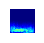

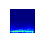

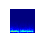

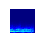

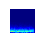

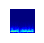

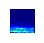

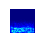

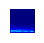

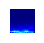

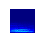

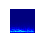

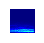

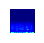

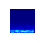

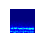

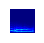

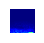

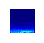

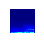

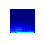

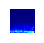

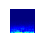

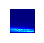

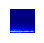

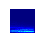

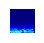

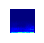

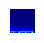

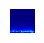

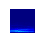

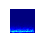

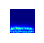

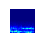

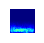

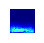

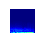

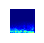

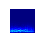

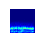

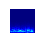

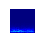

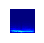

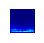

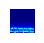

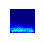

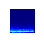

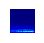

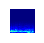

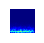

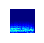

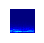

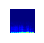

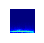

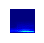

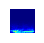

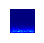

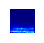

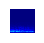

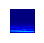

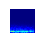

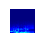

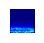

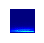

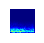

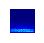

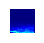

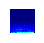

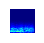

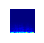

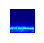

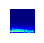

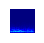

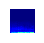

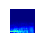

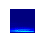

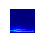

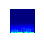

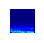

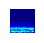

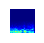

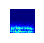

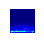

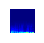

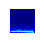

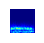

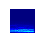

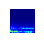

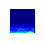

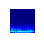

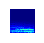

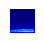

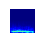

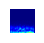

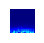

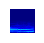

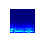

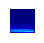

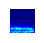

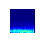

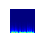

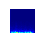

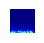

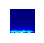

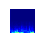

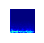

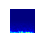

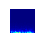

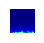

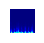

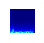

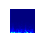

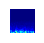

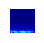

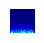

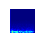

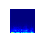

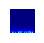

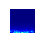

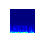

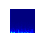

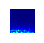

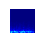

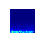

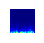

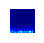

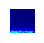

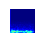

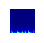

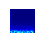

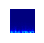

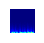

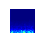

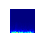

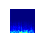

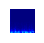

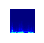

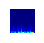

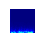

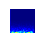

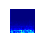

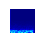

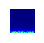

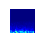

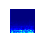

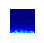

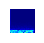

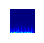

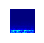

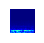

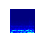

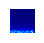

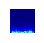

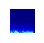

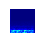

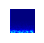

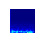

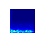

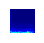

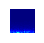

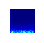

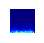

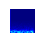

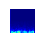

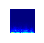

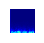

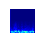

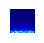

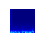

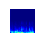

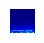

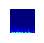

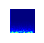

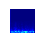

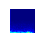

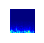

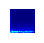

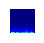

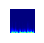

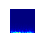

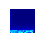

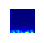

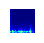

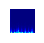

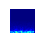

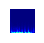

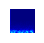

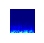

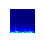

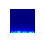

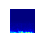

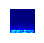

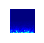

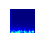

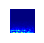

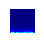

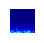

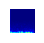

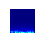

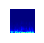

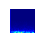

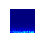

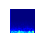

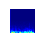

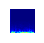

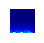

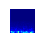

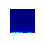

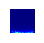

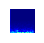

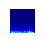

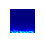

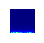

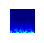

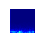

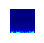

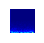

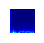

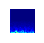

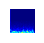

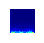

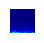

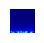

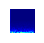

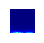

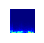

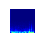

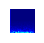

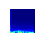

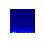

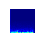

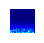

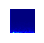

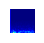

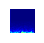

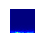

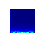

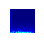

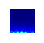

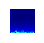

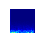

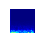

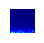

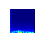

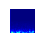

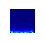

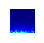

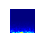

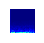

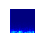

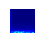

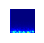

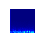

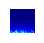

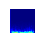

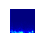

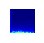

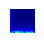

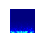

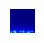

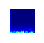

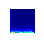

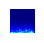

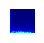

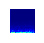

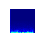

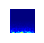

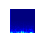

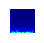

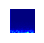

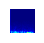

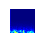

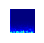

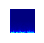

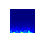

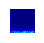

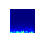

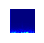

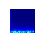

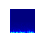

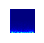

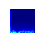

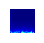

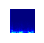

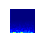

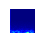

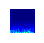

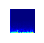

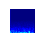

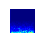

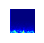

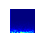

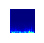

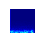

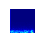

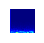

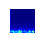

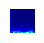

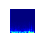

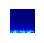

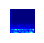

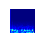

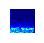

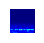

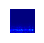

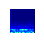

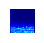

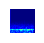

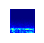

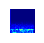

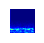

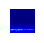

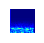

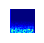

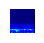

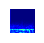

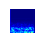

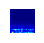

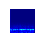

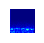

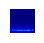

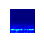

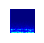

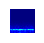

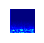

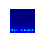

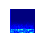

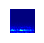

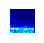

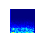

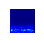

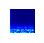

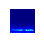

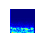

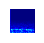

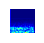

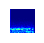

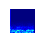

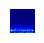

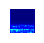

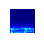

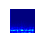

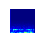

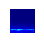

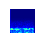

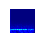

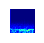

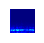

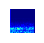

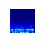

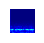

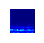

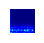

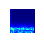

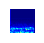

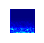

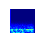

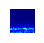

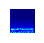

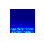

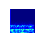

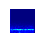

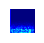

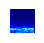

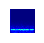

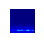

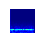

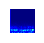

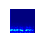

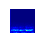

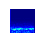

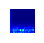

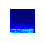

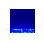

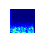

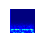

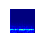

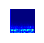

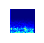

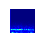

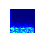

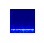

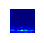

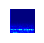

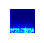

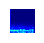

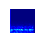

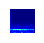

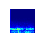

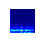

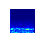

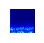

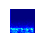

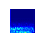

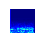

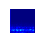

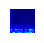

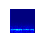

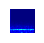

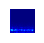

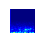

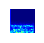

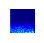

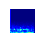

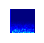

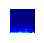

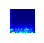

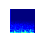

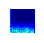

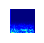

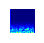

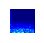

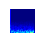

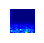

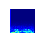

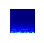

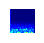

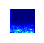

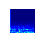

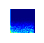

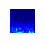

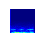

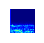

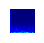

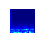

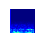

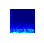

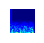

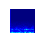

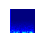

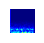

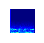

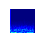

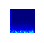

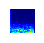

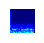

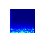

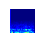

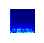

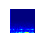

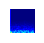

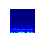

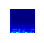

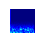

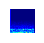

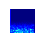

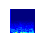

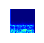

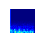

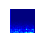

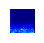

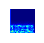

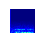

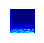

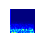

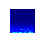

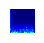

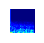

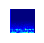

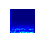

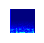

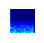

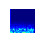

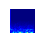

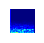

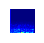

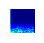

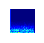

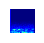

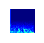

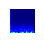

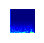

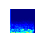

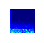

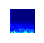

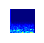

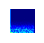

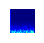

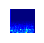

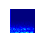

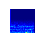

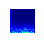

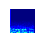

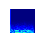

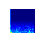

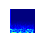

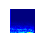

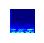

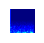

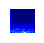

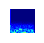

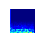

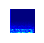

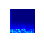

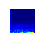

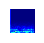

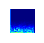

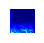

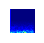

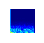

In [ ]:
# Plotting STFT
X_values = []
my_dpi = 96
for i in range(0,500):
  plt.figure(figsize=(32/my_dpi, 32/my_dpi), dpi=my_dpi)
  plt.imshow(np.abs(arr_z[i]), aspect='auto', origin='lower', cmap='jet',
             extent=[arr_t[i].min(), arr_t[i].max(), arr_f[i].min(), 40])
  # plt.title('STFT Magnitude')
  # plt.ylabel('Frequency [Hz]')
  # plt.xlabel('Time [sec]')
  # plt.colorbar()
  plt.axis('off')
  plt.savefig(f'data_500/fig{i}.jpg', bbox_inches='tight', pad_inches=0.0)
  # import matplotlib.pyplot as plt
  # import numpy as np

  # read image file as numpy array
  # img = plt.imread('temp.jpg')

  # # convert grayscale to RGB
  # if len(img.shape) == 2:
  #     img = np.stack((img,)*3, axis=-1)

  # # print image shape
  # X_values.append(img)
  # print(img.shape)

  # plt.show()

In [ ]:
# from PIL import Image

# image = Image.open(f'/content/data_500/fig99.jpg')
# print("Image size:", image.size)

In [ ]:

import cv2
sg_img = []
for i in range(500):

    image = cv2.imread(f'/content/data_500/fig{i}.jpg')

    # BGR -> GRAY
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # let's resize our image to be 150 pixels wide, but in order to
    # prevent our resized image from being skewed/distorted, we must
    # first calculate the ratio of the *new* width to the *old* width
    r = 32 / img.shape[1]
    dim = (32, int(image.shape[0] * r))
    # perform the actual resizing of the image
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    cv2.imwrite('s_img1.png', img)
    sg_img.append(img)
sg_img[0].shape
# sg_img[1].shape

(32, 32)

In [ ]:
# sg_img[221].shape

In [ ]:
sg_df = pd.DataFrame()
for i in range(500):
    temp_df = pd.DataFrame(sg_img[i].flatten())
    sg_df = pd.concat([sg_df, temp_df], axis = 1, ignore_index=True)

In [ ]:
sg_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,15,14,14,14,15,14,14,15,15,14,...,28,40,25,28,24,40,78,27,28,97
1,15,14,14,14,15,14,14,15,15,14,...,23,26,21,23,21,26,41,21,23,48
2,15,14,14,14,15,14,14,15,15,14,...,19,18,17,18,17,18,21,17,18,22
3,15,14,14,14,15,14,14,15,15,14,...,15,17,13,15,13,16,19,15,14,18
4,15,14,14,14,15,14,14,15,15,14,...,17,15,14,17,14,15,20,17,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,105,95,43,53,84,45,109,89,29,94,...,112,219,175,87,195,70,195,133,93,117
1020,94,99,43,69,57,37,120,79,36,119,...,133,221,156,133,198,153,197,101,111,165
1021,104,147,54,55,59,54,120,76,39,122,...,114,137,123,100,207,117,145,68,114,170
1022,94,140,52,42,66,53,128,72,39,109,...,130,121,88,85,200,97,134,51,102,163


In [ ]:
sg_df = sg_df.T

In [ ]:
sg_df.columns = [f"Pixel{i}" for i in range(1024)]

In [ ]:
sg_df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1014,Pixel1015,Pixel1016,Pixel1017,Pixel1018,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023
0,15,15,15,15,15,15,15,15,15,15,...,155,150,119,121,116,105,94,104,94,64
1,14,14,14,14,14,14,14,14,14,14,...,108,106,100,96,94,95,99,147,140,79
2,14,14,14,14,14,14,14,14,14,14,...,58,68,51,50,48,43,43,54,52,35
3,14,14,14,14,14,14,14,14,14,14,...,45,53,48,53,55,53,69,55,42,29
4,15,15,15,15,15,15,15,15,15,15,...,120,97,68,53,58,84,57,59,66,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,40,26,18,16,15,14,15,18,13,14,...,174,169,111,75,61,70,153,117,97,92
496,78,41,21,19,20,17,15,14,19,16,...,168,203,189,186,188,195,197,145,134,164
497,27,21,17,15,17,15,14,15,17,15,...,157,116,50,52,80,133,101,68,51,48
498,28,23,18,14,16,15,14,15,17,15,...,125,91,80,90,94,93,111,114,102,75


In [ ]:
combined_df = pd.concat([sg_df, labels], axis = 1)

In [ ]:
combined_df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023,y_1,y_2,y_3,y_4,y_5
0,15,15,15,15,15,15,15,15,15,15,...,105,94,104,94,64,1,0,0,0,0
1,14,14,14,14,14,14,14,14,14,14,...,95,99,147,140,79,1,0,0,0,0
2,14,14,14,14,14,14,14,14,14,14,...,43,43,54,52,35,1,0,0,0,0
3,14,14,14,14,14,14,14,14,14,14,...,53,69,55,42,29,1,0,0,0,0
4,15,15,15,15,15,15,15,15,15,15,...,84,57,59,66,77,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,40,26,18,16,15,14,15,18,13,14,...,70,153,117,97,92,0,0,0,0,1
496,78,41,21,19,20,17,15,14,19,16,...,195,197,145,134,164,0,0,0,0,1
497,27,21,17,15,17,15,14,15,17,15,...,133,101,68,51,48,0,0,0,0,1
498,28,23,18,14,16,15,14,15,17,15,...,93,111,114,102,75,0,0,0,0,1


In [ ]:
combined_df.to_csv("Spectogram_Data.csv")

In [ ]:
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [ ]:
combined_df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023,y_1,y_2,y_3,y_4,y_5
0,17,16,16,15,15,15,15,14,14,14,...,29,37,30,27,27,0,0,0,1,0
1,20,18,17,16,15,15,15,14,14,15,...,119,110,99,83,64,0,1,0,0,0
2,18,17,17,16,15,15,15,15,15,14,...,162,145,113,84,58,0,1,0,0,0
3,15,15,15,15,15,15,15,15,15,15,...,186,110,134,143,138,0,1,0,0,0
4,28,22,18,15,17,16,15,15,17,15,...,154,132,117,105,98,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15,15,15,15,15,15,15,15,15,15,...,41,111,149,141,88,1,0,0,0,0
496,15,15,15,15,15,15,15,15,15,15,...,136,141,158,162,153,1,0,0,0,0
497,48,29,19,17,16,15,16,17,14,15,...,181,180,173,154,121,0,0,0,0,1
498,17,16,16,15,15,15,15,14,14,14,...,158,125,98,99,126,0,0,1,0,0


In [ ]:
X_train = combined_df.iloc[:450, :-5]
X_test = combined_df.iloc[450:, :-5]
Y_train = combined_df.iloc[:450, -5:]
Y_test = combined_df.iloc[450:, -5:]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

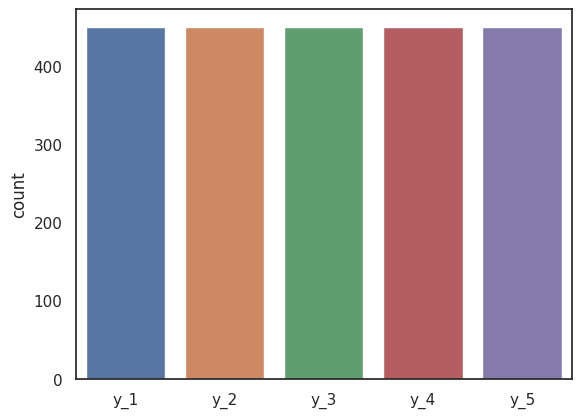

In [ ]:
g = sns.countplot(Y_train)

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel1014,Pixel1015,Pixel1016,Pixel1017,Pixel1018,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023
0,0.066667,0.062745,0.062745,0.058824,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,...,0.113725,0.125490,0.109804,0.125490,0.125490,0.113725,0.145098,0.117647,0.105882,0.105882
1,0.078431,0.070588,0.066667,0.062745,0.058824,0.058824,0.058824,0.054902,0.054902,0.058824,...,0.674510,0.764706,0.772549,0.666667,0.564706,0.466667,0.431373,0.388235,0.325490,0.250980
2,0.070588,0.066667,0.066667,0.062745,0.058824,0.058824,0.058824,0.058824,0.058824,0.054902,...,0.462745,0.458824,0.411765,0.521569,0.596078,0.635294,0.568627,0.443137,0.329412,0.227451
3,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.501961,0.521569,0.627451,0.647059,0.678431,0.729412,0.431373,0.525490,0.560784,0.541176
4,0.109804,0.086275,0.070588,0.058824,0.066667,0.062745,0.058824,0.058824,0.066667,0.058824,...,0.462745,0.501961,0.388235,0.298039,0.372549,0.603922,0.517647,0.458824,0.411765,0.384314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.054902,0.058824,...,0.258824,0.294118,0.388235,0.572549,0.549020,0.309804,0.682353,0.588235,0.423529,0.184314
446,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,...,0.164706,0.176471,0.200000,0.203922,0.200000,0.196078,0.176471,0.172549,0.168627,0.168627
447,0.105882,0.082353,0.066667,0.054902,0.066667,0.062745,0.058824,0.058824,0.066667,0.058824,...,0.588235,0.450980,0.325490,0.392157,0.439216,0.462745,0.588235,0.521569,0.435294,0.321569
448,0.066667,0.062745,0.062745,0.058824,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,...,0.286275,0.419608,0.529412,0.545098,0.517647,0.450980,0.501961,0.505882,0.517647,0.537255


In [ ]:
import tensorflow as tf
# Reshape image in 3 dimensions (height = 32px, width = 32px , canal = 1)
X_train_values = tf.reshape(X_train.values, [-1, 32, 32, 1])
X_test_values = tf.reshape(X_test.values, [-1, 32, 32, 1])

In [ ]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train_values)
X_test = np.array(X_test_values)

In [ ]:
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train1, X_val, Y_train1, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = random_seed)

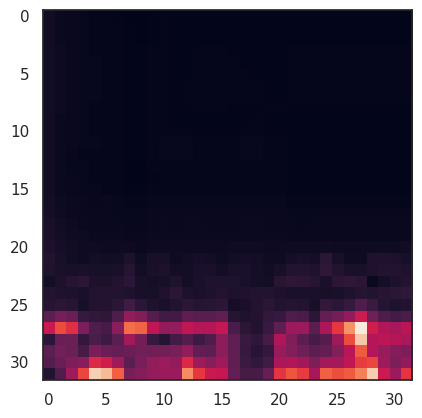

In [ ]:
g = plt.imshow(X_train[264][:,:,0])

In [ ]:
# # Set the CNN model
# # my CNN architechture is In -> [[Conv2D->relu]*1 -> MaxPool2D -> [Conv2D->relu]*1 -> MaxPool2D -> Flatten -> Dense -> Out

# model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))

# model.add(Dense(5, activation = "softmax"))

from keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (7,7),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 16, kernel_size = (7,7),padding = 'Same', activation ='softplus'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='softplus'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='softplus'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.03))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))

In [ ]:
# from keras.optimizers import Adadelta
# Define the optimizer
optimizer = RMSprop(lr = 0.0001, rho = 0.95, epsilon = 1e-08, decay = 0.0)

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=4, verbose=1, factor=0.5, min_lr=0.00001)

# Set epochs and batch_size
epochs = 150
batch_size = 4

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fit the model
history = model.fit(X_train1, Y_train1, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val),
                    verbose = 2, callbacks = [learning_rate_reduction])

Epoch 1/150


90/90 - 2s - loss: 1.9187 - accuracy: 0.3361 - val_loss: 1.7941 - val_accuracy: 0.2222 - lr: 1.0000e-04 - 2s/epoch - 21ms/step
Epoch 2/150


90/90 - 0s - loss: 1.3916 - accuracy: 0.4667 - val_loss: 1.7295 - val_accuracy: 0.3333 - lr: 1.0000e-04 - 500ms/epoch - 6ms/step
Epoch 3/150


90/90 - 1s - loss: 1.0928 - accuracy: 0.5500 - val_loss: 1.5022 - val_accuracy: 0.2889 - lr: 1.0000e-04 - 504ms/epoch - 6ms/step
Epoch 4/150


90/90 - 0s - loss: 1.1158 - accuracy: 0.5694 - val_loss: 1.3681 - val_accuracy: 0.3444 - lr: 1.0000e-04 - 495ms/epoch - 5ms/step
Epoch 5/150


90/90 - 0s - loss: 0.9038 - accuracy: 0.5722 - val_loss: 1.1829 - val_accuracy: 0.5111 - lr: 1.0000e-04 - 488ms/epoch - 5ms/step
Epoch 6/150


90/90 - 0s - loss: 0.8179 - accuracy: 0.6694 - val_loss: 0.8931 - val_accuracy: 0.6556 - lr: 1.0000e-04 - 476ms/epoch - 5ms/step
Epoch 7/150


90/90 - 0s - loss: 0.9663 - accuracy: 0.6000 - val_loss: 0.7793 - val_accuracy: 0.6667 - lr: 1.0000e-04 - 493ms/epoch - 5ms/step
Epoch 8/150


90/90 - 1s - loss: 0.7340 - accuracy: 0.6778 - val_loss: 0.5640 - val_accuracy: 0.7889 - lr: 1.0000e-04 - 517ms/epoch - 6ms/step
Epoch 9/150


90/90 - 0s - loss: 0.7387 - accuracy: 0.6917 - val_loss: 0.4841 - val_accuracy: 0.7667 - lr: 1.0000e-04 - 497ms/epoch - 6ms/step
Epoch 10/150


90/90 - 0s - loss: 0.5517 - accuracy: 0.7389 - val_loss: 0.5174 - val_accuracy: 0.7444 - lr: 1.0000e-04 - 479ms/epoch - 5ms/step
Epoch 11/150


90/90 - 1s - loss: 0.5835 - accuracy: 0.6972 - val_loss: 0.9608 - val_accuracy: 0.6444 - lr: 1.0000e-04 - 565ms/epoch - 6ms/step
Epoch 12/150


90/90 - 0s - loss: 0.5500 - accuracy: 0.7528 - val_loss: 0.3858 - val_accuracy: 0.8444 - lr: 1.0000e-04 - 500ms/epoch - 6ms/step
Epoch 13/150


90/90 - 0s - loss: 0.5223 - accuracy: 0.7722 - val_loss: 0.3478 - val_accuracy: 0.8111 - lr: 1.0000e-04 - 485ms/epoch - 5ms/step
Epoch 14/150


90/90 - 0s - loss: 0.4530 - accuracy: 0.8000 - val_loss: 0.3273 - val_accuracy: 0.8222 - lr: 1.0000e-04 - 479ms/epoch - 5ms/step
Epoch 15/150


90/90 - 1s - loss: 0.3879 - accuracy: 0.8444 - val_loss: 0.5175 - val_accuracy: 0.8000 - lr: 1.0000e-04 - 502ms/epoch - 6ms/step
Epoch 16/150


90/90 - 1s - loss: 0.4769 - accuracy: 0.7722 - val_loss: 0.3530 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 588ms/epoch - 7ms/step
Epoch 17/150


90/90 - 1s - loss: 0.3795 - accuracy: 0.8194 - val_loss: 0.3875 - val_accuracy: 0.8667 - lr: 1.0000e-04 - 687ms/epoch - 8ms/step
Epoch 18/150


90/90 - 1s - loss: 0.3769 - accuracy: 0.8500 - val_loss: 0.2468 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 679ms/epoch - 8ms/step
Epoch 19/150


90/90 - 1s - loss: 0.4139 - accuracy: 0.8389 - val_loss: 0.3826 - val_accuracy: 0.8111 - lr: 1.0000e-04 - 626ms/epoch - 7ms/step
Epoch 20/150


90/90 - 0s - loss: 0.3494 - accuracy: 0.8556 - val_loss: 0.4018 - val_accuracy: 0.8000 - lr: 1.0000e-04 - 496ms/epoch - 6ms/step
Epoch 21/150


90/90 - 0s - loss: 0.3868 - accuracy: 0.8306 - val_loss: 0.3263 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 22/150


90/90 - 0s - loss: 0.3349 - accuracy: 0.8583 - val_loss: 0.2846 - val_accuracy: 0.8444 - lr: 1.0000e-04 - 489ms/epoch - 5ms/step
Epoch 23/150


90/90 - 0s - loss: 0.2986 - accuracy: 0.8722 - val_loss: 0.2541 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 470ms/epoch - 5ms/step
Epoch 24/150


90/90 - 0s - loss: 0.3322 - accuracy: 0.8583 - val_loss: 0.4092 - val_accuracy: 0.8222 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 25/150


90/90 - 0s - loss: 0.3072 - accuracy: 0.8750 - val_loss: 0.2234 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 473ms/epoch - 5ms/step
Epoch 26/150


90/90 - 0s - loss: 0.3693 - accuracy: 0.8500 - val_loss: 0.3492 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 493ms/epoch - 5ms/step
Epoch 27/150


90/90 - 0s - loss: 0.3297 - accuracy: 0.8861 - val_loss: 0.2190 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 491ms/epoch - 5ms/step
Epoch 28/150


90/90 - 0s - loss: 0.3230 - accuracy: 0.8694 - val_loss: 0.2968 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 477ms/epoch - 5ms/step
Epoch 29/150


90/90 - 0s - loss: 0.3056 - accuracy: 0.8611 - val_loss: 0.2787 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 30/150


90/90 - 0s - loss: 0.3103 - accuracy: 0.8444 - val_loss: 0.3169 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 31/150


90/90 - 1s - loss: 0.2457 - accuracy: 0.8889 - val_loss: 0.6658 - val_accuracy: 0.8333 - lr: 1.0000e-04 - 508ms/epoch - 6ms/step
Epoch 32/150


90/90 - 0s - loss: 0.3471 - accuracy: 0.8694 - val_loss: 0.2612 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 489ms/epoch - 5ms/step
Epoch 33/150


90/90 - 0s - loss: 0.2870 - accuracy: 0.8528 - val_loss: 0.2328 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 34/150


90/90 - 0s - loss: 0.2620 - accuracy: 0.8861 - val_loss: 0.4109 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 479ms/epoch - 5ms/step
Epoch 35/150


90/90 - 1s - loss: 0.2644 - accuracy: 0.8806 - val_loss: 0.3627 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 504ms/epoch - 6ms/step
Epoch 36/150


90/90 - 0s - loss: 0.2845 - accuracy: 0.8889 - val_loss: 0.2940 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 497ms/epoch - 6ms/step
Epoch 37/150


90/90 - 1s - loss: 0.2923 - accuracy: 0.8806 - val_loss: 0.4104 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 500ms/epoch - 6ms/step
Epoch 38/150


90/90 - 0s - loss: 0.2485 - accuracy: 0.9111 - val_loss: 0.2646 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 496ms/epoch - 6ms/step
Epoch 39/150


90/90 - 0s - loss: 0.2771 - accuracy: 0.8944 - val_loss: 0.5306 - val_accuracy: 0.8333 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 40/150


90/90 - 1s - loss: 0.2767 - accuracy: 0.8861 - val_loss: 0.2189 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 678ms/epoch - 8ms/step
Epoch 41/150


90/90 - 1s - loss: 0.1987 - accuracy: 0.9056 - val_loss: 0.3416 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 731ms/epoch - 8ms/step
Epoch 42/150


90/90 - 1s - loss: 0.3286 - accuracy: 0.8861 - val_loss: 0.3037 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 618ms/epoch - 7ms/step
Epoch 43/150


90/90 - 1s - loss: 0.2141 - accuracy: 0.9139 - val_loss: 0.3070 - val_accuracy: 0.8556 - lr: 1.0000e-04 - 501ms/epoch - 6ms/step
Epoch 44/150


90/90 - 0s - loss: 0.2601 - accuracy: 0.8917 - val_loss: 0.1720 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 478ms/epoch - 5ms/step
Epoch 45/150


90/90 - 0s - loss: 0.2467 - accuracy: 0.8778 - val_loss: 0.2937 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 495ms/epoch - 6ms/step
Epoch 46/150


90/90 - 0s - loss: 0.2209 - accuracy: 0.9167 - val_loss: 0.2814 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 47/150


90/90 - 1s - loss: 0.1979 - accuracy: 0.9194 - val_loss: 0.2228 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 508ms/epoch - 6ms/step
Epoch 48/150


90/90 - 0s - loss: 0.2303 - accuracy: 0.9111 - val_loss: 0.3136 - val_accuracy: 0.8667 - lr: 1.0000e-04 - 494ms/epoch - 5ms/step
Epoch 49/150


90/90 - 0s - loss: 0.2284 - accuracy: 0.8972 - val_loss: 0.3516 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 495ms/epoch - 5ms/step
Epoch 50/150


90/90 - 0s - loss: 0.2258 - accuracy: 0.9417 - val_loss: 0.3673 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 51/150


90/90 - 0s - loss: 0.1706 - accuracy: 0.9333 - val_loss: 0.2915 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step
Epoch 52/150


90/90 - 0s - loss: 0.2295 - accuracy: 0.9139 - val_loss: 0.2557 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 53/150


90/90 - 0s - loss: 0.2930 - accuracy: 0.9111 - val_loss: 0.3434 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 481ms/epoch - 5ms/step
Epoch 54/150


90/90 - 1s - loss: 0.1909 - accuracy: 0.9194 - val_loss: 0.3553 - val_accuracy: 0.8667 - lr: 1.0000e-04 - 506ms/epoch - 6ms/step
Epoch 55/150


90/90 - 0s - loss: 0.2255 - accuracy: 0.9083 - val_loss: 0.1742 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 481ms/epoch - 5ms/step
Epoch 56/150


90/90 - 0s - loss: 0.2457 - accuracy: 0.9139 - val_loss: 0.3620 - val_accuracy: 0.8556 - lr: 1.0000e-04 - 488ms/epoch - 5ms/step
Epoch 57/150


90/90 - 0s - loss: 0.1877 - accuracy: 0.9139 - val_loss: 0.3464 - val_accuracy: 0.8444 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 58/150


90/90 - 1s - loss: 0.2031 - accuracy: 0.9278 - val_loss: 0.1742 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 511ms/epoch - 6ms/step
Epoch 59/150


90/90 - 0s - loss: 0.1894 - accuracy: 0.9194 - val_loss: 0.2507 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 491ms/epoch - 5ms/step
Epoch 60/150


90/90 - 0s - loss: 0.2075 - accuracy: 0.9111 - val_loss: 0.2630 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 492ms/epoch - 5ms/step
Epoch 61/150


90/90 - 0s - loss: 0.1829 - accuracy: 0.9278 - val_loss: 0.2183 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 62/150


90/90 - 1s - loss: 0.1748 - accuracy: 0.9333 - val_loss: 0.2195 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 524ms/epoch - 6ms/step
Epoch 63/150


90/90 - 1s - loss: 0.1518 - accuracy: 0.9389 - val_loss: 0.2346 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 664ms/epoch - 7ms/step
Epoch 64/150


90/90 - 1s - loss: 0.2437 - accuracy: 0.9139 - val_loss: 0.1498 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 710ms/epoch - 8ms/step
Epoch 65/150


90/90 - 1s - loss: 0.1837 - accuracy: 0.9333 - val_loss: 0.2539 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 767ms/epoch - 9ms/step
Epoch 66/150


90/90 - 0s - loss: 0.1391 - accuracy: 0.9306 - val_loss: 0.3208 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step
Epoch 67/150


90/90 - 0s - loss: 0.2304 - accuracy: 0.9111 - val_loss: 0.4369 - val_accuracy: 0.8444 - lr: 1.0000e-04 - 500ms/epoch - 6ms/step
Epoch 68/150


90/90 - 0s - loss: 0.1535 - accuracy: 0.9361 - val_loss: 0.1466 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 69/150


90/90 - 0s - loss: 0.2255 - accuracy: 0.9333 - val_loss: 0.2048 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 491ms/epoch - 5ms/step
Epoch 70/150


90/90 - 0s - loss: 0.2082 - accuracy: 0.9278 - val_loss: 0.2650 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 478ms/epoch - 5ms/step
Epoch 71/150


90/90 - 0s - loss: 0.1778 - accuracy: 0.9167 - val_loss: 0.2591 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 72/150


90/90 - 0s - loss: 0.1666 - accuracy: 0.9333 - val_loss: 0.2944 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 485ms/epoch - 5ms/step
Epoch 73/150


90/90 - 1s - loss: 0.1943 - accuracy: 0.9306 - val_loss: 0.2405 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 505ms/epoch - 6ms/step
Epoch 74/150


90/90 - 0s - loss: 0.1794 - accuracy: 0.9361 - val_loss: 0.2356 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step
Epoch 75/150


90/90 - 0s - loss: 0.2585 - accuracy: 0.9278 - val_loss: 0.1463 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 485ms/epoch - 5ms/step
Epoch 76/150


90/90 - 0s - loss: 0.1108 - accuracy: 0.9528 - val_loss: 0.3147 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 77/150


90/90 - 0s - loss: 0.1982 - accuracy: 0.9111 - val_loss: 0.2204 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 78/150


90/90 - 0s - loss: 0.1986 - accuracy: 0.9167 - val_loss: 0.5525 - val_accuracy: 0.8667 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 79/150


90/90 - 0s - loss: 0.2571 - accuracy: 0.9278 - val_loss: 0.3661 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 80/150


90/90 - 0s - loss: 0.1923 - accuracy: 0.9306 - val_loss: 0.2998 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 81/150


90/90 - 0s - loss: 0.0814 - accuracy: 0.9778 - val_loss: 0.3371 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 473ms/epoch - 5ms/step
Epoch 82/150


90/90 - 0s - loss: 0.2055 - accuracy: 0.9417 - val_loss: 0.2602 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 491ms/epoch - 5ms/step
Epoch 83/150


90/90 - 0s - loss: 0.1367 - accuracy: 0.9556 - val_loss: 0.3300 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 489ms/epoch - 5ms/step
Epoch 84/150


90/90 - 0s - loss: 0.1724 - accuracy: 0.9333 - val_loss: 0.4023 - val_accuracy: 0.8556 - lr: 1.0000e-04 - 496ms/epoch - 6ms/step
Epoch 85/150


90/90 - 0s - loss: 0.1153 - accuracy: 0.9500 - val_loss: 0.5518 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step
Epoch 86/150


90/90 - 1s - loss: 0.1817 - accuracy: 0.9389 - val_loss: 0.2700 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 774ms/epoch - 9ms/step
Epoch 87/150


90/90 - 1s - loss: 0.1103 - accuracy: 0.9611 - val_loss: 0.2946 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 738ms/epoch - 8ms/step
Epoch 88/150


90/90 - 1s - loss: 0.2154 - accuracy: 0.9583 - val_loss: 0.3828 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 618ms/epoch - 7ms/step
Epoch 89/150


90/90 - 0s - loss: 0.2258 - accuracy: 0.9194 - val_loss: 0.3022 - val_accuracy: 0.8889 - lr: 1.0000e-04 - 499ms/epoch - 6ms/step
Epoch 90/150


90/90 - 0s - loss: 0.1315 - accuracy: 0.9500 - val_loss: 0.0930 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 91/150


90/90 - 1s - loss: 0.1386 - accuracy: 0.9500 - val_loss: 0.1718 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 506ms/epoch - 6ms/step
Epoch 92/150


90/90 - 0s - loss: 0.1612 - accuracy: 0.9389 - val_loss: 0.0992 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 493ms/epoch - 5ms/step
Epoch 93/150


90/90 - 0s - loss: 0.1520 - accuracy: 0.9528 - val_loss: 0.1865 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 499ms/epoch - 6ms/step
Epoch 94/150


90/90 - 0s - loss: 0.1263 - accuracy: 0.9500 - val_loss: 0.2449 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 476ms/epoch - 5ms/step
Epoch 95/150


90/90 - 1s - loss: 0.1730 - accuracy: 0.9583 - val_loss: 0.2007 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 508ms/epoch - 6ms/step
Epoch 96/150


90/90 - 0s - loss: 0.1427 - accuracy: 0.9472 - val_loss: 0.3752 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 474ms/epoch - 5ms/step
Epoch 97/150


90/90 - 0s - loss: 0.1638 - accuracy: 0.9583 - val_loss: 0.1472 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 494ms/epoch - 5ms/step
Epoch 98/150


90/90 - 0s - loss: 0.1306 - accuracy: 0.9583 - val_loss: 0.0789 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 99/150


90/90 - 0s - loss: 0.0985 - accuracy: 0.9583 - val_loss: 0.2029 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 492ms/epoch - 5ms/step
Epoch 100/150


90/90 - 0s - loss: 0.1331 - accuracy: 0.9556 - val_loss: 0.3441 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 481ms/epoch - 5ms/step
Epoch 101/150


90/90 - 0s - loss: 0.0704 - accuracy: 0.9778 - val_loss: 0.0962 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 488ms/epoch - 5ms/step
Epoch 102/150


90/90 - 0s - loss: 0.0621 - accuracy: 0.9667 - val_loss: 0.1775 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 103/150


90/90 - 1s - loss: 0.0752 - accuracy: 0.9861 - val_loss: 0.3757 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 509ms/epoch - 6ms/step
Epoch 104/150


90/90 - 0s - loss: 0.1968 - accuracy: 0.9444 - val_loss: 0.3496 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 105/150


90/90 - 0s - loss: 0.1242 - accuracy: 0.9611 - val_loss: 0.3545 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 500ms/epoch - 6ms/step
Epoch 106/150


90/90 - 0s - loss: 0.0889 - accuracy: 0.9694 - val_loss: 0.4235 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 479ms/epoch - 5ms/step
Epoch 107/150


90/90 - 1s - loss: 0.1862 - accuracy: 0.9389 - val_loss: 0.1075 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 505ms/epoch - 6ms/step
Epoch 108/150


90/90 - 0s - loss: 0.1216 - accuracy: 0.9556 - val_loss: 0.1514 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 109/150


90/90 - 1s - loss: 0.1314 - accuracy: 0.9667 - val_loss: 0.2263 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 676ms/epoch - 8ms/step
Epoch 110/150


90/90 - 1s - loss: 0.1060 - accuracy: 0.9694 - val_loss: 0.1587 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 707ms/epoch - 8ms/step
Epoch 111/150


90/90 - 1s - loss: 0.0811 - accuracy: 0.9778 - val_loss: 0.2768 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 620ms/epoch - 7ms/step
Epoch 112/150


90/90 - 1s - loss: 0.0668 - accuracy: 0.9806 - val_loss: 0.3104 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 511ms/epoch - 6ms/step
Epoch 113/150


90/90 - 0s - loss: 0.0856 - accuracy: 0.9722 - val_loss: 0.2089 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 474ms/epoch - 5ms/step
Epoch 114/150


90/90 - 0s - loss: 0.0850 - accuracy: 0.9694 - val_loss: 0.0998 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 481ms/epoch - 5ms/step
Epoch 115/150


90/90 - 0s - loss: 0.1162 - accuracy: 0.9750 - val_loss: 0.1234 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 486ms/epoch - 5ms/step
Epoch 116/150


90/90 - 0s - loss: 0.0665 - accuracy: 0.9694 - val_loss: 0.1757 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 117/150


90/90 - 0s - loss: 0.1258 - accuracy: 0.9639 - val_loss: 0.2649 - val_accuracy: 0.9000 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 118/150


90/90 - 0s - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0986 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 496ms/epoch - 6ms/step
Epoch 119/150


90/90 - 0s - loss: 0.0862 - accuracy: 0.9778 - val_loss: 0.2213 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 471ms/epoch - 5ms/step
Epoch 120/150


90/90 - 0s - loss: 0.1339 - accuracy: 0.9472 - val_loss: 0.1023 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 487ms/epoch - 5ms/step
Epoch 121/150


90/90 - 0s - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.2211 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 465ms/epoch - 5ms/step
Epoch 122/150


90/90 - 0s - loss: 0.0843 - accuracy: 0.9722 - val_loss: 0.0930 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 495ms/epoch - 5ms/step
Epoch 123/150


90/90 - 0s - loss: 0.1120 - accuracy: 0.9722 - val_loss: 0.2354 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 124/150


90/90 - 0s - loss: 0.1085 - accuracy: 0.9639 - val_loss: 0.1301 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 496ms/epoch - 6ms/step
Epoch 125/150


90/90 - 0s - loss: 0.0485 - accuracy: 0.9806 - val_loss: 0.3273 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 483ms/epoch - 5ms/step
Epoch 126/150


90/90 - 0s - loss: 0.1167 - accuracy: 0.9583 - val_loss: 0.0998 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 127/150


90/90 - 1s - loss: 0.1023 - accuracy: 0.9778 - val_loss: 0.6379 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 519ms/epoch - 6ms/step
Epoch 128/150


90/90 - 0s - loss: 0.0603 - accuracy: 0.9722 - val_loss: 0.6702 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 480ms/epoch - 5ms/step
Epoch 129/150


90/90 - 0s - loss: 0.0555 - accuracy: 0.9861 - val_loss: 0.1893 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 485ms/epoch - 5ms/step
Epoch 130/150


90/90 - 0s - loss: 0.0870 - accuracy: 0.9667 - val_loss: 0.1047 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step
Epoch 131/150


90/90 - 1s - loss: 0.0839 - accuracy: 0.9694 - val_loss: 0.1160 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 515ms/epoch - 6ms/step
Epoch 132/150


90/90 - 1s - loss: 0.0821 - accuracy: 0.9667 - val_loss: 0.1506 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 639ms/epoch - 7ms/step
Epoch 133/150


90/90 - 1s - loss: 0.0603 - accuracy: 0.9778 - val_loss: 0.3488 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 789ms/epoch - 9ms/step
Epoch 134/150


90/90 - 1s - loss: 0.0499 - accuracy: 0.9861 - val_loss: 0.1376 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 806ms/epoch - 9ms/step
Epoch 135/150


90/90 - 0s - loss: 0.0948 - accuracy: 0.9667 - val_loss: 0.3437 - val_accuracy: 0.9111 - lr: 1.0000e-04 - 495ms/epoch - 5ms/step
Epoch 136/150


90/90 - 0s - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.1454 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 485ms/epoch - 5ms/step
Epoch 137/150


90/90 - 0s - loss: 0.0494 - accuracy: 0.9833 - val_loss: 0.2829 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 489ms/epoch - 5ms/step
Epoch 138/150


90/90 - 0s - loss: 0.1640 - accuracy: 0.9611 - val_loss: 0.6662 - val_accuracy: 0.8778 - lr: 1.0000e-04 - 492ms/epoch - 5ms/step
Epoch 139/150


90/90 - 1s - loss: 0.0613 - accuracy: 0.9750 - val_loss: 0.3350 - val_accuracy: 0.9222 - lr: 1.0000e-04 - 508ms/epoch - 6ms/step
Epoch 140/150


90/90 - 0s - loss: 0.0993 - accuracy: 0.9667 - val_loss: 0.1644 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 484ms/epoch - 5ms/step
Epoch 141/150


90/90 - 1s - loss: 0.0719 - accuracy: 0.9833 - val_loss: 0.1091 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 504ms/epoch - 6ms/step
Epoch 142/150


90/90 - 0s - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.1385 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 470ms/epoch - 5ms/step
Epoch 143/150


90/90 - 0s - loss: 0.0839 - accuracy: 0.9861 - val_loss: 0.1681 - val_accuracy: 0.9333 - lr: 1.0000e-04 - 490ms/epoch - 5ms/step
Epoch 144/150


90/90 - 0s - loss: 0.0266 - accuracy: 0.9889 - val_loss: 0.0958 - val_accuracy: 0.9778 - lr: 1.0000e-04 - 474ms/epoch - 5ms/step
Epoch 145/150


90/90 - 0s - loss: 0.0746 - accuracy: 0.9833 - val_loss: 0.1257 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 489ms/epoch - 5ms/step
Epoch 146/150


90/90 - 0s - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.1297 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 491ms/epoch - 5ms/step
Epoch 147/150


90/90 - 1s - loss: 0.0505 - accuracy: 0.9750 - val_loss: 0.1174 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 572ms/epoch - 6ms/step
Epoch 148/150


90/90 - 0s - loss: 0.0467 - accuracy: 0.9833 - val_loss: 0.1122 - val_accuracy: 0.9556 - lr: 1.0000e-04 - 492ms/epoch - 5ms/step
Epoch 149/150


90/90 - 0s - loss: 0.0214 - accuracy: 0.9889 - val_loss: 0.0769 - val_accuracy: 0.9667 - lr: 1.0000e-04 - 497ms/epoch - 6ms/step
Epoch 150/150


90/90 - 0s - loss: 0.0847 - accuracy: 0.9750 - val_loss: 0.1745 - val_accuracy: 0.9444 - lr: 1.0000e-04 - 482ms/epoch - 5ms/step


**Function to plot Loss and Accuracy Vs Epochs**

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

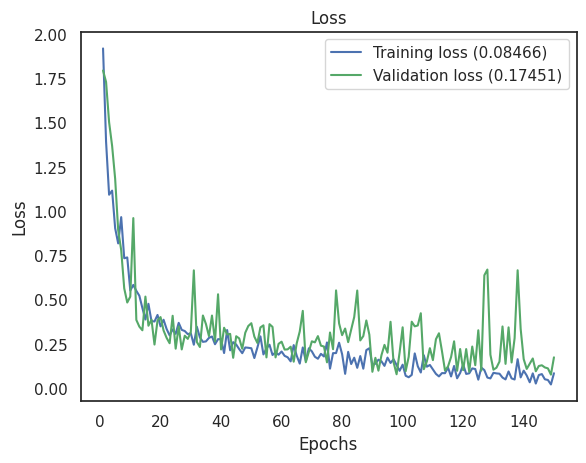

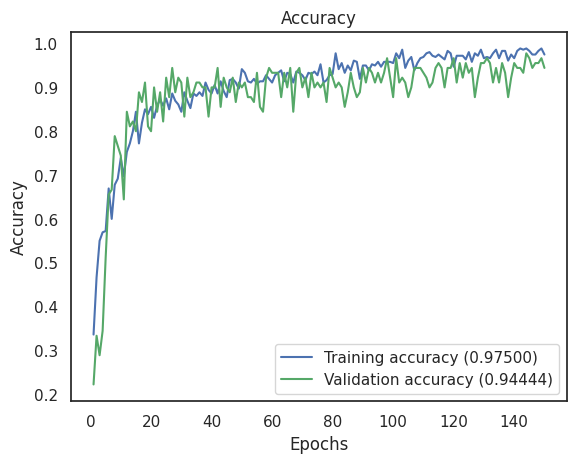

In [ ]:
plot_history(history)

In [ ]:
from sklearn import metrics

actual = np.argmax(Y_test, axis=1)
predicted1 = np.argmax(model.predict(X_test), axis=1)

confusion_matrix1 = metrics.confusion_matrix(actual, predicted1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ['A', 'B', 'C', 'D', 'E'])

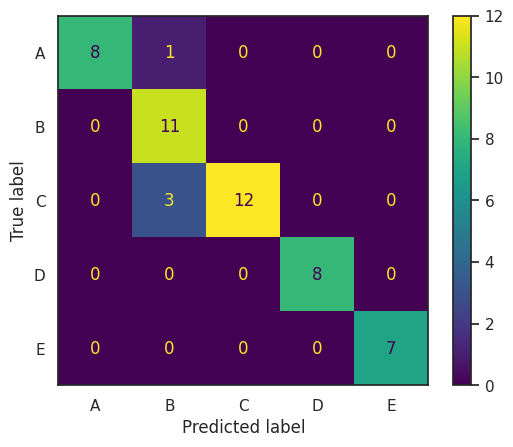

In [ ]:
cm1_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("Accuracy = ", accuracy_score(actual, predicted1))
print("Recall = ", recall_score(actual, predicted1,  average = None))
print("F1_Score = ", f1_score(actual, predicted1, average = None))


Accuracy =  0.92
Recall =  [0.88888889 1.         0.8        1.         1.        ]
F1_Score =  [0.94117647 0.84615385 0.88888889 1.         1.        ]


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        800       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        12560     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)       